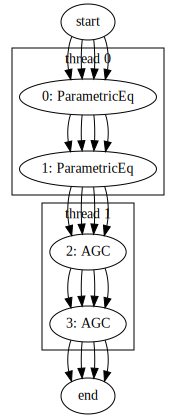

In [18]:
from dsp_ultra.design.pipeline import Pipeline
from dsp_ultra.stages.parametric_eq import ParametricEq
from dsp_ultra.stages.agc import AGC

# 4 inputs
p = Pipeline(4)

with p.add_thread() as t:
    [pe0, pe1] = t.stages((ParametricEq, ParametricEq), p.i)
  
with p.add_thread() as t:
    agc = t.stage(AGC, pe1.o)
    agc1 = t.stage(AGC, agc.o)

p.draw()
p.validate()

In [19]:
import time
from dsp_ultra.design.pipeline import generate_dsp_main
generate_dsp_main(p)
!cmake --build build -j
!xrun bin/2AMi2o2xxxxxx/app_usb_aud_xk_evk_xu316_dsp_2AMi2o2xxxxxx.xe
time.sleep(5)

[  1%] Built target cmd_map_generation
[  1%] Generating ../.build_2AMi2o2xxxxxx/build/dsp_pipeline/dsp_main.c.pca.xml
[  1%] Generating ../.build_1AMi2o2xxxxxx/build/dsp_pipeline/dsp_main.c.pca.xml
[  1%] Generating ../.build_2AMi2o2xxxxxx/pca.xml
[  1%] Generating ../.build_1AMi2o2xxxxxx/pca.xml
Consolidate compiler generated dependencies of target app_usb_aud_xk_evk_xu316_dsp_2AMi2o2xxxxxx
Consolidate compiler generated dependencies of target app_usb_aud_xk_evk_xu316_dsp_1AMi2o2xxxxxx
[  1%] Building C object CMakeFiles/app_usb_aud_xk_evk_xu316_dsp_2AMi2o2xxxxxx.dir/dsp_pipeline/dsp_main.c.obj
[  1%] Building C object CMakeFiles/app_usb_aud_xk_evk_xu316_dsp_1AMi2o2xxxxxx.dir/dsp_pipeline/dsp_main.c.obj
[  1%] Linking C executable ../bin/2AMi2o2xxxxxx/app_usb_aud_xk_evk_xu316_dsp_2AMi2o2xxxxxx.xe
[  1%] Linking C executable ../bin/1AMi2o2xxxxxx/app_usb_aud_xk_evk_xu316_dsp_1AMi2o2xxxxxx.xe
Constraint check for tile[0]:
  Memory available:       524288,   used:      55920 .  OKAY
    

In [22]:
# do tuning
#pe0["filter_coeffs"] = list(range(10))
agc1["gain"] = str(2.0)

from dsp_ultra.design.pipeline import send_config_to_device
send_config_to_device(p, "/Users/shuchitak/sandboxes/host_xvf_control/build/xvf_host")

/Users/shuchitak/sandboxes/host_xvf_control/build/xvf_host --use usb --instance-id 3 agc_gain 2.0
